<a href="https://colab.research.google.com/github/CreatorGeetansh/Machine-Learning-Projects/blob/main/Product_Demand_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'superstore-sales:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3537638%2F6165985%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240613%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240613T205011Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da20fa3252856541dbf80b4cb3cd49a2bf295ba6e41c12387094cbef2ebda4d9a1cc217d8017d909fe703a40e20e792146a37417d6c1e0f9ae4f49a7bb5b7848347bc40931b196cebe69bdfbc5c63573a98ca23f3196031f3f8a05ffd6849188d857b0eaab197b652489cc4338dfb4d459065d67f3426711b20be2585cea3924a42a73940bacb70a564204c89cfed3d80add9b88f416d07b4c2e20c47853bed43d7b6ee2740bc213b1c2ff935683edcce2efcab089e08c0dfc4eab96daa603cc2256de3437c8a3a7f1c6634abd8236a623cf74b9a2cb73f066abd0bd67209479bb5d18dd4e3063c6558362706b9166807ed1198bd5058dd9e9ec3c1e0dec676b0'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 489351 bytes downloaded
Downloaded and uncompressed: superstore-sales
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-sales/superstore_final_dataset (1).csv


In [3]:
store=pd.read_csv("/kaggle/input/superstore-sales/superstore_final_dataset (1).csv",encoding='latin-1')
store

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [4]:
store.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

# Exploratory Data Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print(store.head())

print(store.describe())

print(store.info())

   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   
4    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   

   Postal_Code Region       Product_ID         Cat

# Data preprocessing

In [6]:
store.dropna(inplace=True)

# Convert date columns to the appropriate data type
store['Order_Date'] = pd.to_datetime(store['Order_Date'], format = 'mixed')
store['Ship_Date'] = pd.to_datetime(store['Ship_Date'], format = 'mixed')

# Visualization

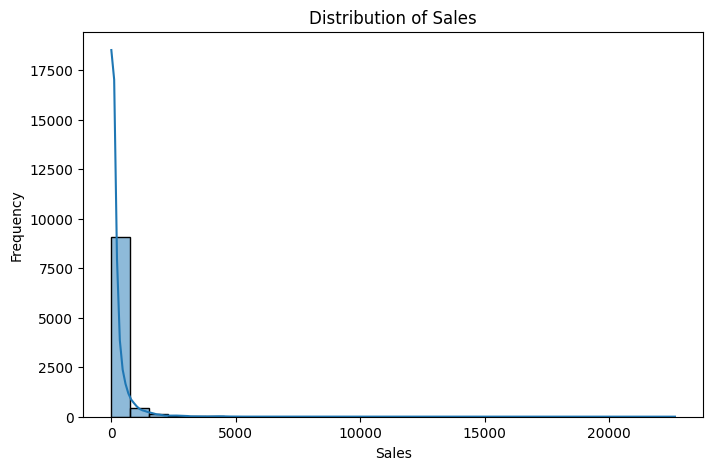

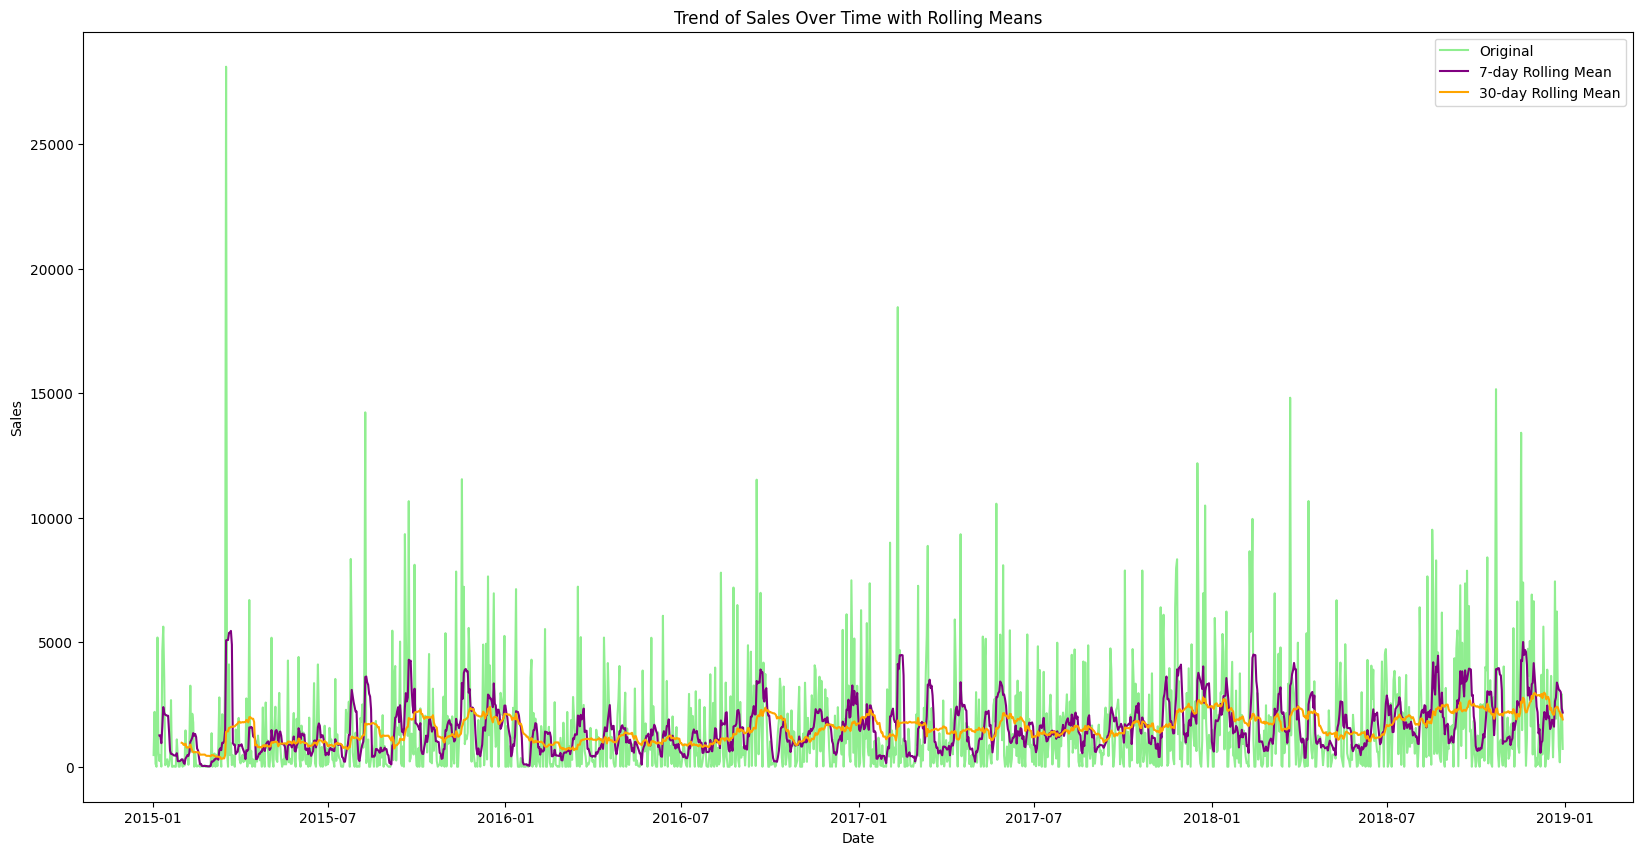

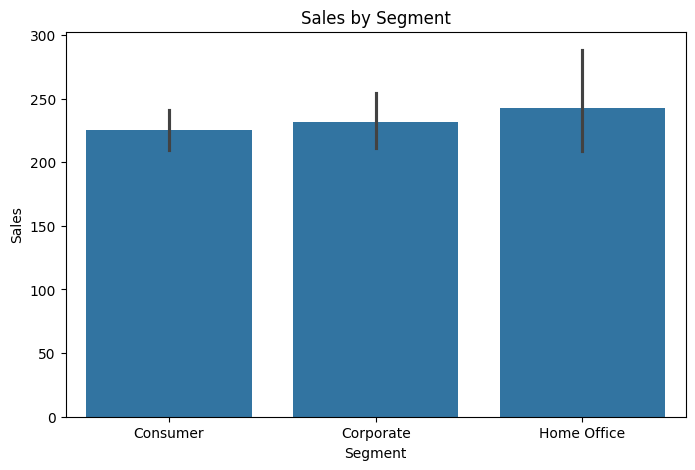

In [7]:
# Visualize the distribution of Sales
plt.figure(figsize=(8, 5))
sns.histplot(store['Sales'], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Visualize sales over time
# daily sales each month
daily_sales = store.resample('D', on='Order_Date')['Sales'].sum()

daily_sales_weekly = daily_sales.rolling(window=7).mean()
daily_sales_monthly = daily_sales.rolling(window=30).mean()

plt.figure(figsize=(20, 10))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, label='Original', color = "lightgreen")
sns.lineplot(x=daily_sales_weekly.index, y=daily_sales_weekly.values, label='7-day Rolling Mean', color = "purple")
sns.lineplot(x=daily_sales_monthly.index, y=daily_sales_monthly.values, label='30-day Rolling Mean', color = "orange")
plt.title('Trend of Sales Over Time with Rolling Means')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Visualize sales by segment
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='Sales', data=store)
plt.title("Sales by Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.show()

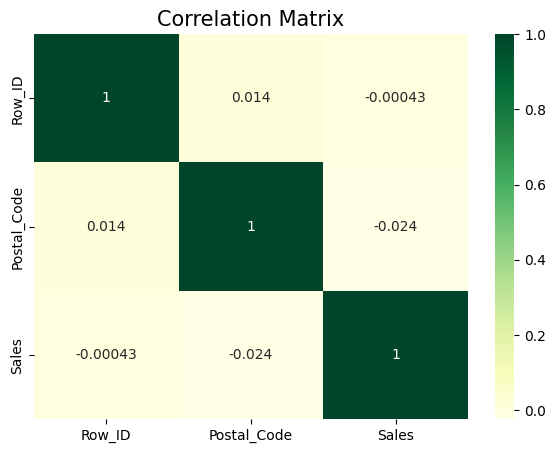

In [8]:
numeric_columns = store.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
fig, ax = plt.subplots()
fig.set_size_inches(7,5)
sns.heatmap(correlation_matrix, annot = True,cmap='YlGn')
plt.title('Correlation Matrix',fontsize=15);

# Top Selling Products

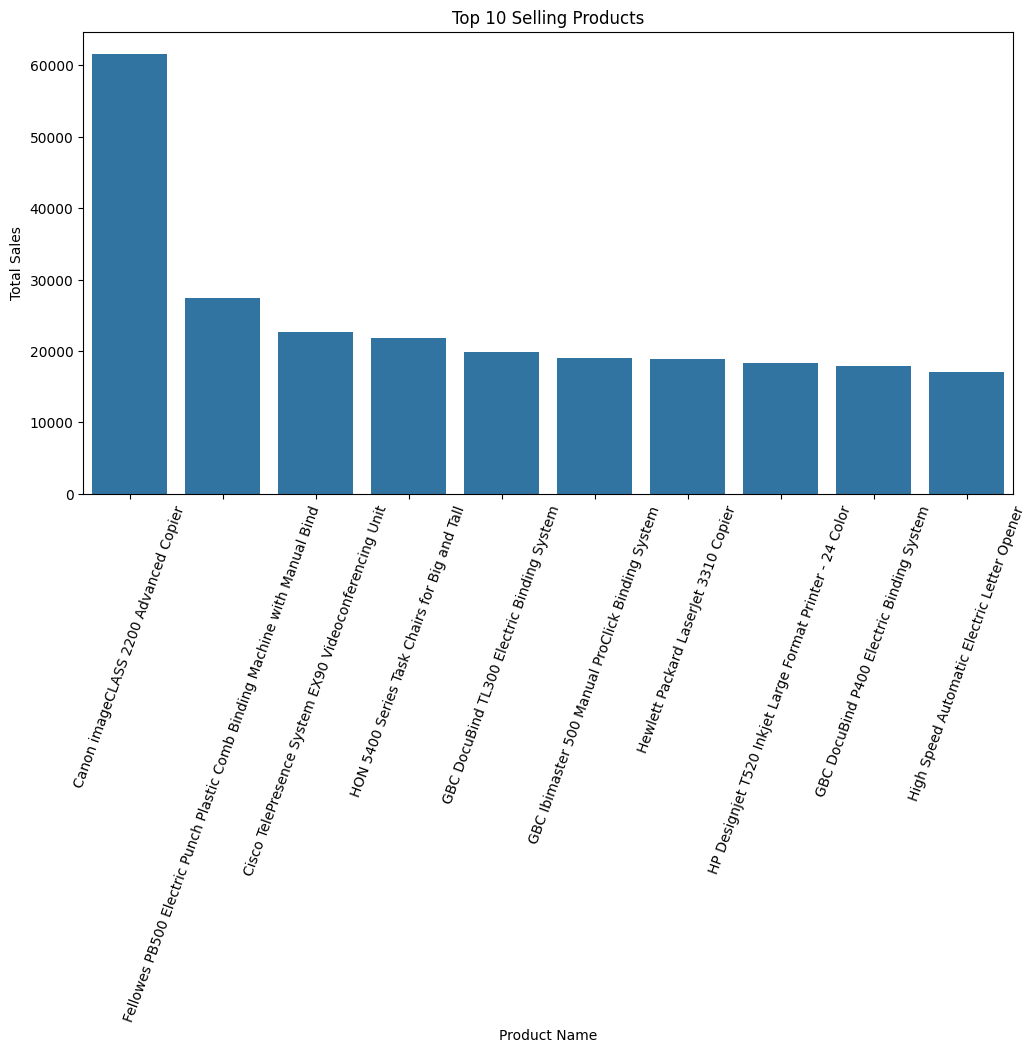

In [9]:
top_products = store.groupby('Product_Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=70)
plt.title("Top 10 Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

**Shipment mode analysis**

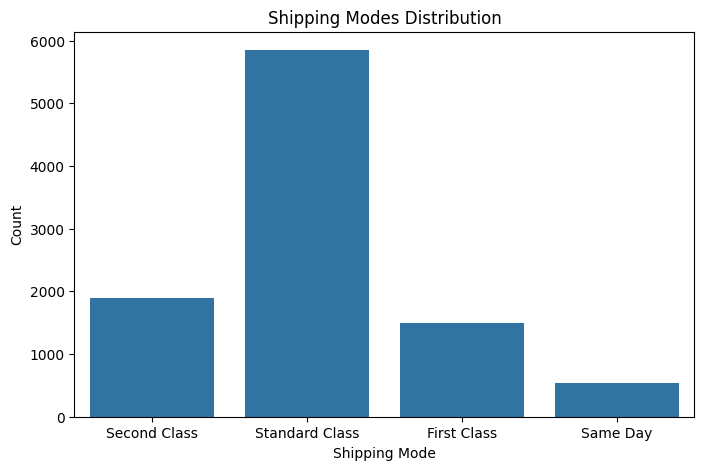

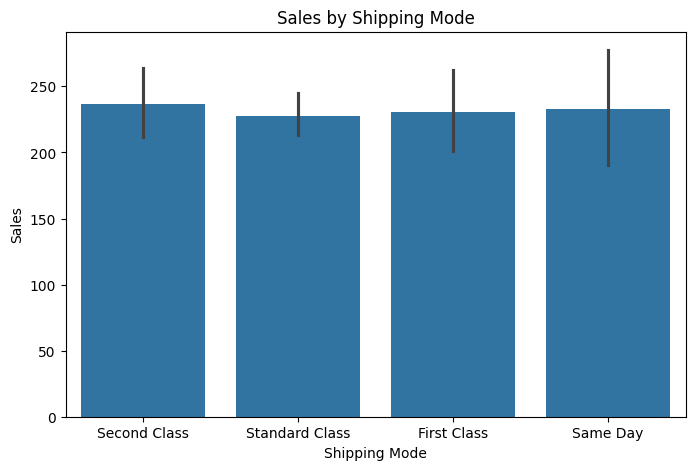

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Ship_Mode', data=store)
plt.title("Shipping Modes Distribution")
plt.xlabel("Shipping Mode")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Ship_Mode', y='Sales', data=store)
plt.title("Sales by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Sales")
plt.show()

In [11]:
dummy_df = store.copy()

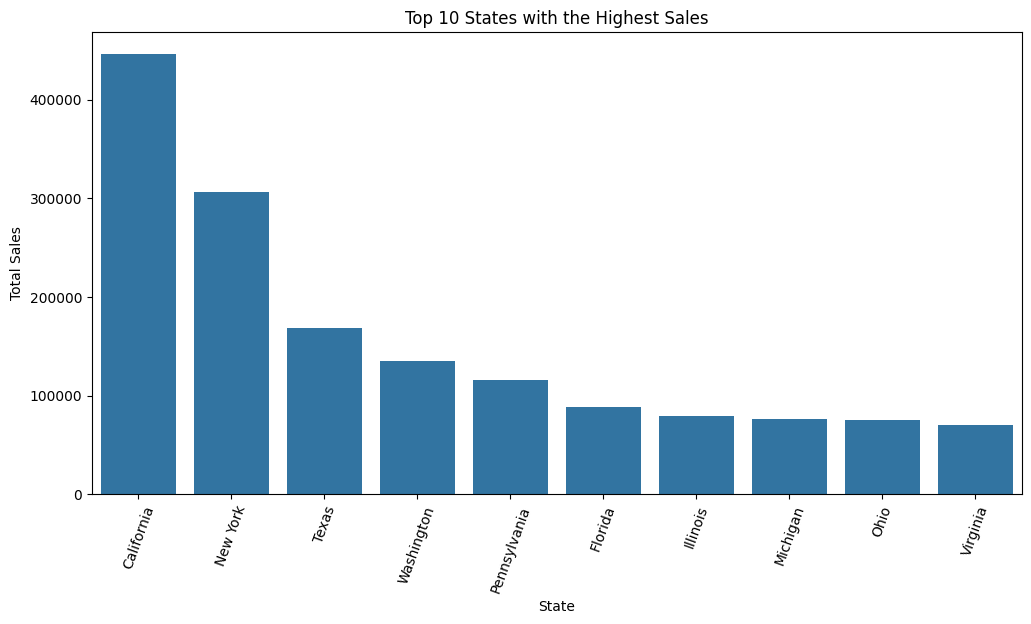

(-1.0999982753447157,
 1.0999999076163227,
 -1.0999988489540231,
 1.0999970894256248)

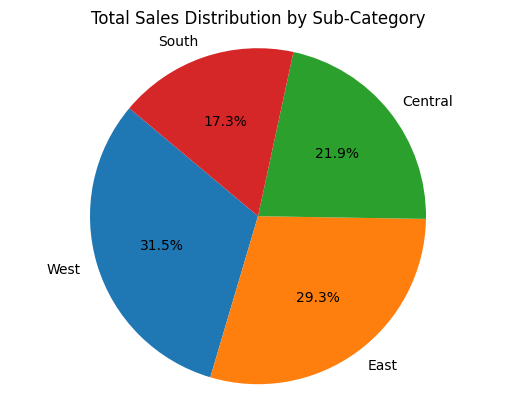

In [12]:
# Top States with the highest sales
top_states = store.groupby('State')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.xticks(rotation=70)
plt.title("Top 10 States with the Highest Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.show()

# Sales by Region
region_sales = dummy_df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution by Sub-Category')
plt.axis('equal')

**Sub category sales**

<ipython-input-13-295792c690f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Sub_Category', data=sub_category_sales, palette='viridis')


Text(0.5, 1.0, 'Total Sales by Sub-Category')

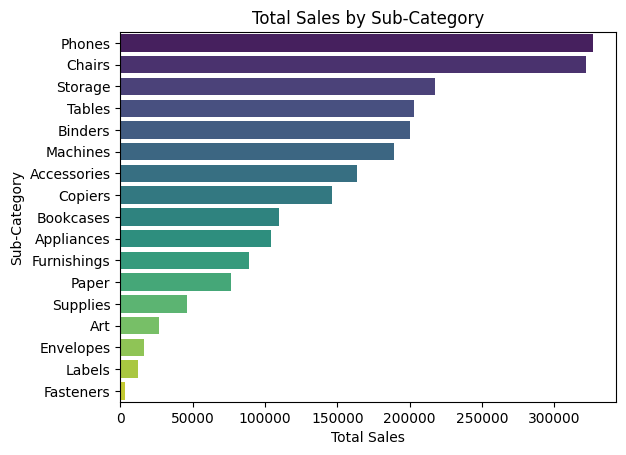

In [13]:
sub_category_sales = dummy_df.groupby('Sub_Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
sns.barplot(x='Sales', y='Sub_Category', data=sub_category_sales, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.title('Total Sales by Sub-Category')

**Customer segment analysis**

<ipython-input-22-fa7d25e52fdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales_segments['Sales'] = np.log1p(df_sales_segments['Sales'])


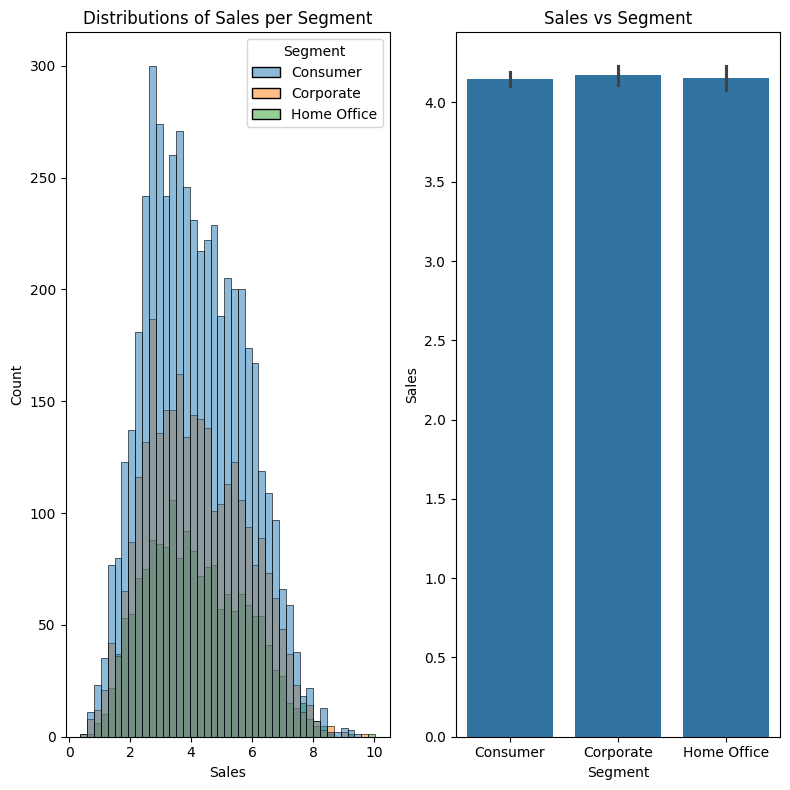

In [22]:
sales_segments = ['Sales', 'Segment']
df_sales_segments = store[sales_segments]
df_sales_segments['Sales'] = np.log1p(df_sales_segments['Sales'])


plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
sns.histplot(data=df_sales_segments, x='Sales', hue='Segment')
plt.title("Distributions of Sales per Segment")

plt.subplot(1, 2 ,2)
sns.barplot(data=df_sales_segments, x='Segment', y='Sales')
plt.title("Sales vs Segment")
plt.tight_layout()
plt.show()

# Time Series Analysis

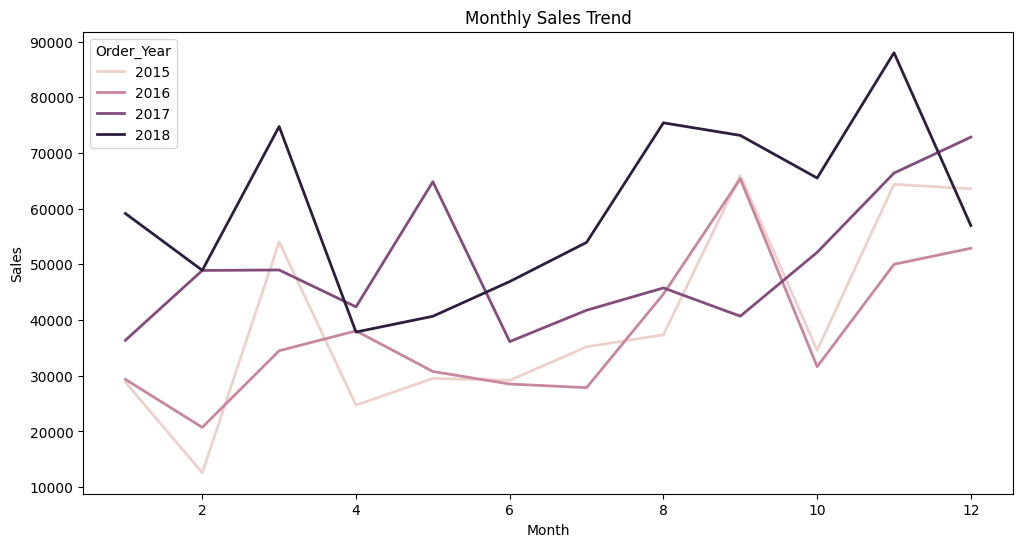

In [15]:
store['Order_Month'] = store['Order_Date'].dt.month
store['Order_Year'] = store['Order_Date'].dt.year

monthly_sales_trend = store.groupby(['Order_Year', 'Order_Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Order_Month', y='Sales', hue='Order_Year', data=monthly_sales_trend, linewidth = 2)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

# Does shipment mode affects Sales?

ANOVA Test Results:
F-statistic: 0.09097298566337089
P-value: 0.965036695995067
Result: Fail to Reject Null Hypothesis - There is no significant difference in average sales across different shipping modes.


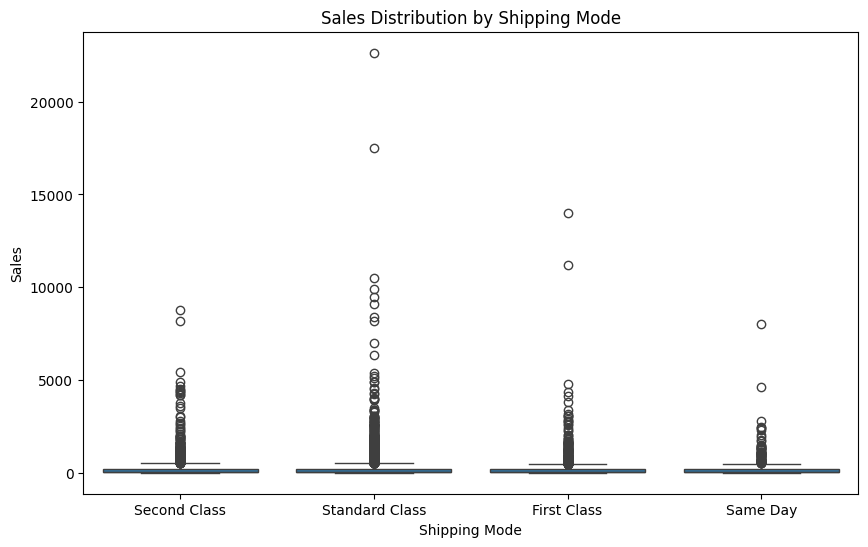

In [16]:
from scipy.stats import f_oneway

# Hypothesis Testing - ANOVA Test
shipping_modes = store['Ship_Mode'].unique()
grouped_data = [store[store['Ship_Mode'] == mode]['Sales'] for mode in shipping_modes]

f_stat, p_value = f_oneway(*grouped_data)
alpha = 0.05

print("ANOVA Test Results:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Result: Reject Null Hypothesis - There are significant differences in average sales across different shipping modes.")
else:
    print("Result: Fail to Reject Null Hypothesis - There is no significant difference in average sales across different shipping modes.")


# Visualization of Sales by Shipping Mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship_Mode', y='Sales', data=store)
plt.title("Sales Distribution by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Sales")
plt.show()

# Model and predictions

AUC ROC Score: 0.9363011508951407


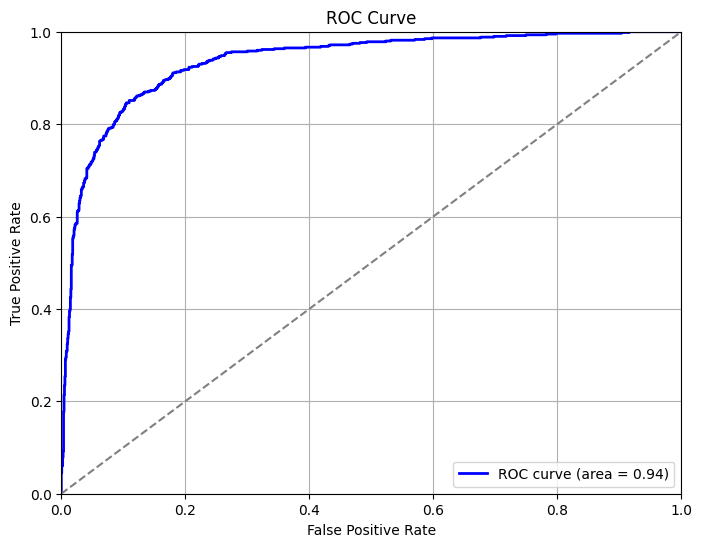

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Drop rows with missing values in the 'Sales' column
store = store.dropna(subset=['Sales'])
store = store.drop(['Row_ID', 'Order_ID', 'Customer_ID', 'Customer_Name', 'Postal_Code', 'Ship_Mode', 'Country','Ship_Date', 'Region', 'Order_Date', 'Order_Month', 'Order_Year'], axis = 1)

# Define the target variable (whether a product is of interest or not)
store['Product_of_Interest'] = store['Sales'] > 150

# Select features and target variable
X = store.drop(columns=['Sales', 'Product_of_Interest'])
y = store['Product_of_Interest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


logistic_model = LogisticRegression(random_state=42, max_iter=1000, solver='saga')

logistic_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', logistic_model)
])


logistic_model_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_proba = logistic_model_pipeline.predict_proba(X_test)[:, 1]

# Calculate the AUC ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC ROC Score:", auc_roc)

# Create the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [18]:
# check if the data is biased or not..
store['Product_of_Interest'].value_counts()

Product_of_Interest
False    6771
True     3018
Name: count, dtype: int64

In [19]:
X_test.columns

Index(['Segment', 'City', 'State', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name'],
      dtype='object')

In [20]:
from xgboost import XGBClassifier
x_model = XGBClassifier()

In [21]:
boost_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', x_model)
])
boost_model_pipeline.fit(X_train, y_train)
y_pred_new = boost_model_pipeline.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC ROC Score:", auc_roc)

AUC ROC Score: 0.9363011508951407


**Conclusion** - *Logistic Regression model predicts whether the given product is in demand or not according to the sales with 94% accuracy.*